In [491]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import holoviews as hv
import panel as pn

In [492]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [493]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [494]:
# Plot your data to see what's in your DataFrame
plot1 = df_market_data.hvplot.line( 
    width=800,
    height=400,
    rot=90
)
#pn.serve(plot1) #needed to use this because hvplot was completely broken when using vscode/jupyter nb
pn.serve(plot1)

Launching server at http://localhost:61122


### Prepare the Data

In [495]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [496]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
crypto_names = df_market_data.index.tolist()
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=crypto_names)

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [497]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [498]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_market_data_scaled)
    inertia_values.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [499]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

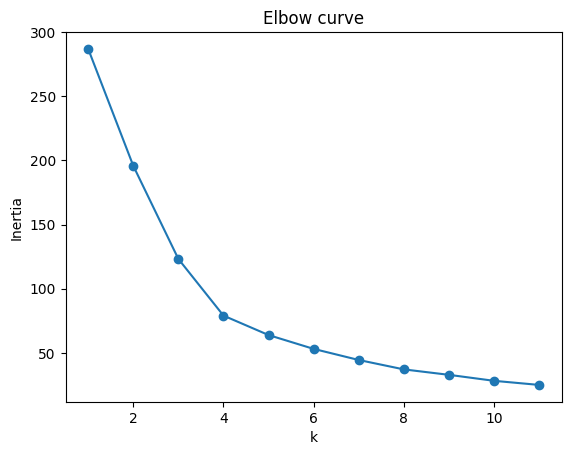

In [500]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker="o")
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [501]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=1)

In [502]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [503]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(predicted_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [504]:
# Create a copy of the DataFrame
df_clustered = df_market_data.copy()

In [505]:
# Add a new column to the DataFrame with the predicted clusters
df_clustered['cluster'] = predicted_clusters

# Display sample data
df_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [506]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plot2 = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",
    hover_cols=["coin_id"],
    title="Kmeans clusters",
    width=800,
    height=400
)
pn.serve(plot2)

Launching server at http://localhost:61129


---

### Optimize Clusters with Principal Component Analysis.

In [507]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [508]:
# Use the PCA model with `fit_transform` to reduce to three principal components.
pca_result = pca_model.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
df_market_data_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2", "PC3"], index=crypto_names)
df_market_data_pca.head()

,PC1,PC2,PC3
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [509]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
ex_vr = pca_model.explained_variance_ratio_
print(ex_vr)


[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89503166 or about 89.5%

In [510]:
# Create a new DataFrame with the PCA data.
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data
new_df_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2", "PC3"], index=crypto_names)
new_df_pca.head()

,PC1,PC2,PC3
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [511]:
# Create a list with the number of k-values from 1 to 11
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [512]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(new_df_pca)
    inertia_values_pca.append(kmeans_model.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [513]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k_values': k_values, 'inertia_values_pca': inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

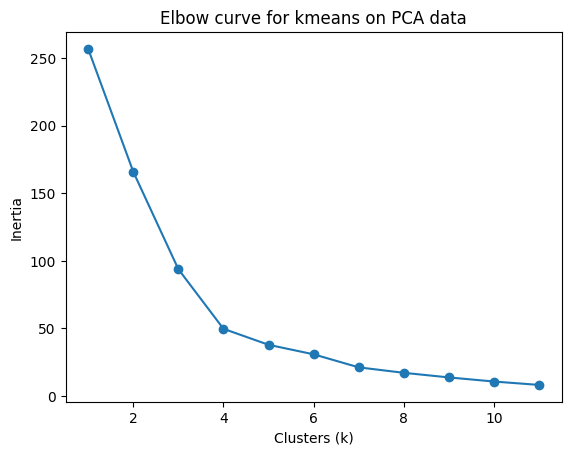

In [514]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow_pca['k_values'], df_elbow_pca['inertia_values_pca'], marker='o')
plt.title('Elbow curve for kmeans on PCA data')
plt.xlabel('Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [515]:
df_market_data_pca = pd.DataFrame(data=pca_model.fit_transform(df_market_data_scaled), columns=["PC1", "PC2", "PC3"], index=crypto_names)
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=3, random_state=1)

In [516]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_market_data_pca)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [517]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans_model.predict(df_market_data_pca)
# Print the resulting array of cluster values.
predicted_clusters_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [518]:
# Create a copy of the DataFrame with the PCA data
df_clustered_pca = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_clustered_pca['cluster'] = predicted_clusters_pca

# Display sample data
df_clustered_pca.head()

,PC1,PC2,PC3,cluster
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [519]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plot3 = df_clustered_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="cluster",
    cmap="viridis",
    hover_cols=["coin_id"],
    title="Kmeans clustering on PCA data",
    width=800,
    height=400
)
pn.serve(plot3)

Launching server at http://localhost:61138


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [520]:
# Composite plot to contrast the Elbow curves
# Convert the lists to DataFrames for hvplot
df_elbow = pd.DataFrame({'k_values': k_values, 'inertia_values': inertia_values})
df_elbow_pca = pd.DataFrame({'k_values': k_values, 'inertia_values_pca': inertia_values_pca})

# Plotting the Elbow curves using hvplot
elbow_plot = df_elbow.hvplot.line(x='k_values', y='inertia_values', title='Elbow Curve for Original Data', xlabel='Number of Clusters (k)', ylabel='Inertia', width=400, height=300)
elbow_plot_pca = df_elbow_pca.hvplot.line(x='k_values', y='inertia_values_pca', title='Elbow Curve for PCA Data', xlabel='Number of Clusters (k)', ylabel='Inertia', width=400, height=300)

# Display the composite plot
plot4 = hv.Layout(elbow_plot + elbow_plot_pca).cols(2)
pn.serve(plot4)

Launching server at http://localhost:61139


In [521]:
# Composite plot to contrast the clusters
plot5 = hv.Layout(plot2 + plot3)
pn.serve(plot5)

Launching server at http://localhost:61142


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features results in a less accurate (totally inaccurate) model.